In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import glob
import os
from functools import reduce
sys.path.append('../')
from package_global_functions import *

def getTimeEvosFrozenPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/evo_to_stationary_frozen/time_evos_dif_cond'
    else:
        path = '/time_evos_dif_cond'
    return path

# mean field time evolutions path:
def getTimeEvosPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/evo_to_stationary/time_evos_dif_cond'
    else:
        path = '/time_evos_dif_cond'
    return path

def get_avg_traj(dfs):
    df_avg = reduce(lambda a,b: a.add(b, fill_value=0), dfs)
    df_avg = df_avg/len(dfs)
    return df_avg

In [6]:
latexFont(ticklabelssize=12,labelsize=14, legendsize=11)

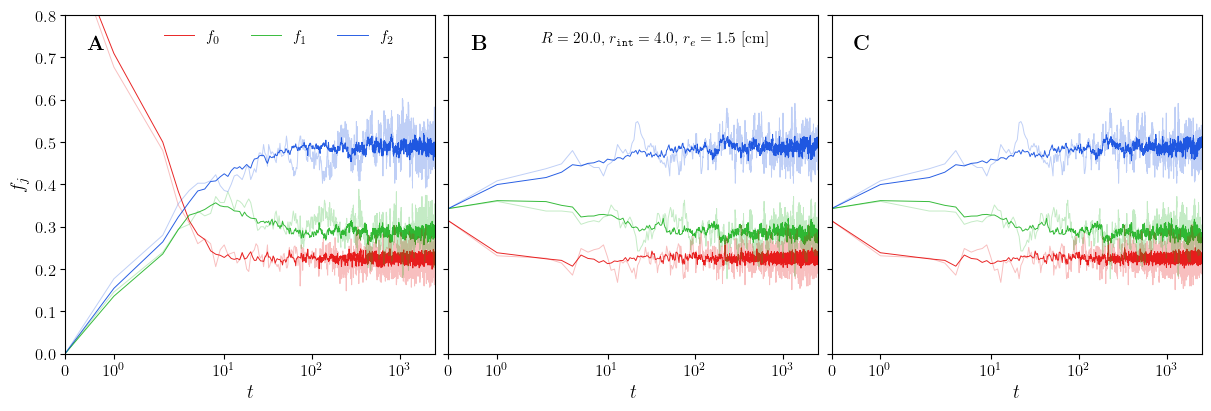

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(12,4), constrained_layout=True)

pi1, pi2, q1, q2, l = 0.3, 0.3, 7.0, 10.0, 0.6 # aixi en tinc 100
arena_r, exclusion_r, pushLabel = 20.0, 1.5, 'nopush'
interac_r = 4.0
N = 35
folders = [f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ar_{arena_r}_ir_{interac_r}_er_{exclusion_r}_{pushLabel}',
           f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_thirds_ar_{arena_r}_ir_{interac_r}_er_{exclusion_r}_{pushLabel}',
           f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_thirds_ar_{arena_r}_ir_{interac_r}_er_{exclusion_r}_{pushLabel}']

intEvoFiles = [f'/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_Euler.csv',
               f'/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_thirds_Euler.csv',
               f'/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_julia_Euler.csv']

for i,(folder,intEvoFile) in enumerate(zip(folders,intEvoFiles)):
    ax[i].set(xlabel='$t$', xscale='symlog', xlim=(0,2500), ylim=(0,0.8))
    files = glob.glob(f'{getTimeEvosFrozenPath()}/{folder}/*')
    dfs = [pd.read_csv(file) for file in files]
    # print(len(dfs))
    df_avg = get_avg_traj(dfs)
    ax[i].plot(df_avg['iter'], df_avg['f0'], alpha=0.85, lw=0.7, label='$f_0$', color='xkcd:red')
    ax[i].plot(df_avg['iter'], df_avg['f1'], alpha=0.85, lw=0.7, label='$f_1$', color='xkcd:green')
    ax[i].plot(df_avg['iter'], df_avg['f2'], alpha=0.85, lw=0.7, label='$f_2$', color='xkcd:blue')
    # intEvo = pd.read_csv(f'{getTimeEvosPath()}/{intEvoFile}')
    # ax[i].plot(intEvo['iter'], intEvo['f0'], lw=0.7, ls='--', color='xkcd:red')
    # ax[i].plot(intEvo['iter'], intEvo['f1'], lw=0.7, ls='--', color='xkcd:green')
    # ax[i].plot(intEvo['iter'], intEvo['f2'], lw=0.7, ls='--', color='xkcd:blue')
    # a single realization: NO! It's too much
    # ax[i].plot(dfs[0]['iter'], dfs[0]['f0'], alpha=0.3, lw=0.7, color='xkcd:red')
    # ax[i].plot(dfs[0]['iter'], dfs[0]['f1'], alpha=0.3, lw=0.7, color='xkcd:green')
    # ax[i].plot(dfs[0]['iter'], dfs[0]['f2'], alpha=0.3, lw=0.7, color='xkcd:blue')
    # average over ten realizations
    df_avg = get_avg_traj(dfs[:10])
    ax[i].plot(df_avg['iter'], df_avg['f0'], alpha=0.25, lw=0.7, color='xkcd:red')
    ax[i].plot(df_avg['iter'], df_avg['f1'], alpha=0.25, lw=0.7, color='xkcd:green')
    ax[i].plot(df_avg['iter'], df_avg['f2'], alpha=0.25, lw=0.7, color='xkcd:blue')

ax[0].set_ylabel('$f_j$')
ax[0].legend(frameon=False, loc=(0.25,0.9), ncol=3)
ax[1].tick_params(labelleft=False)
ax[2].tick_params(labelleft=False)

xpos,ypos = 0.06, 0.9
ax[0].text(xpos,ypos, r'$\textbf{A}$', transform=ax[0].transAxes, fontsize=15)
ax[1].text(xpos,ypos, r'$\textbf{B}$', transform=ax[1].transAxes, fontsize=15)
ax[2].text(xpos,ypos, r'$\textbf{C}$', transform=ax[2].transAxes, fontsize=15)

ax[1].text(0.25, 0.92, rf'$R = {arena_r}, \, r_{{\tt int}} = {interac_r}, \, r_{{e}} = {exclusion_r}$ [cm]', transform=ax[1].transAxes, fontsize=11)

fig.savefig(f'time_evos_dif_ic_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_quenched_ar_{arena_r}_ir_{interac_r}_er_{exclusion_r}_{pushLabel}.pdf')